In [2]:
# Reading the data
import pandas as pd
data = pd.read_csv('fruits.csv')

# Showing the first 5 lines of data on the screen
data.head(5)

,Unnamed: 0,Weight,Surface,Fruit
0,0,144.533160,0.829955,0
1,1,149.921747,0.604190,0
2,2,148.834463,0.878738,0
3,3,139.184578,0.695882,0
4,4,150.781653,0.771810,0


In [3]:
from sklearn import model_selection
# Preparing data and create training and test inputs and labels
inputs_train, inputs_test, labels_train, labels_test = \
       model_selection.train_test_split(data[['Weight', 'Surface']].values, data['Fruit'].values, test_size=0.2)

print("Training set size:", inputs_train.shape)
print("Test set size:", inputs_test.shape)

Training set size: (160, 2)
Test set size: (40, 2)


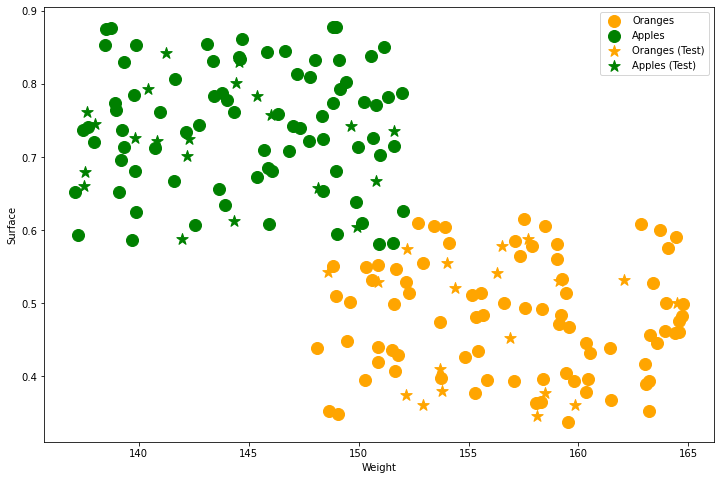

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['lines.markersize'] = 12

# Plotting data
plt.figure(figsize=(12, 8))

plt.scatter(inputs_train[labels_train==1, 0], inputs_train[labels_train==1, 1], c='orange',  label='Oranges')
plt.scatter(inputs_train[labels_train==0, 0], inputs_train[labels_train==0, 1], c='green', label='Apples')
plt.scatter(inputs_test[labels_test==1, 0], inputs_test[labels_test==1, 1], c='orange',  label='Oranges (Test)',  marker='*')
plt.scatter(inputs_test[labels_test==0, 0], inputs_test[labels_test==0, 1], c='green', label='Apples (Test)', marker='*')

plt.xlabel('Weight')
plt.ylabel('Surface')
plt.legend()
plt.show()

In [5]:
from sklearn.svm import SVC

# Selecting the classifier we want to use
svm = SVC(kernel="linear")

# Learning (or training our model) based on inputs and labels from our dataset
svm.fit(inputs_train, labels_train)

SVC(kernel='linear')

In [6]:
# INPUT: enter weight and surface value for a imaginary and unknown fruit
weight  = 160
surface = 0.3

# Use our model to predict which fruit this is
fruit_type = svm.predict([[weight, surface]])
fruit_type = "orange" if fruit_type == 1 else "apple"
print (fruit_type)

orange


In [14]:
from sklearn.metrics import accuracy_score

# Classify what the fruits are based on the test data
classifications = svm.predict(inputs_test)

# Print the score on the test data
print("SVM Test Set Score:")
print(accuracy_score(labels_test, classifications)*100)

ValueError: X.shape[1] = 7 should be equal to 2, the number of features at training time

In [8]:
from sklearn.metrics import confusion_matrix
confusion_matrix(labels_test, classifications)

array([[21,  0],
       [ 1, 18]], dtype=int64)

In [13]:
from sklearn.metrics import precision_score, recall_score

print('Precision:', '{:0.2f}'.format(precision_score(labels_test, classifications)))
print('Recall:', '{:0.2f}'.format(recall_score(labels_test, classifications)))

ValueError: Found input variables with inconsistent numbers of samples: [2863, 40]